In [1]:
import graspy

import numpy as np
%matplotlib inline

In C:\Users\dfran\Miniconda3\envs\ndd_5\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\dfran\Miniconda3\envs\ndd_5\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\dfran\Miniconda3\envs\ndd_5\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\dfran\Miniconda3\envs\ndd_5\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\dfran\Miniconda3\envs\ndd_5\lib\

In [2]:
from graspy.simulations import sbm

n_communities = [50, 50, 50]
p = [[0.5, 0.1, 0.05],
     [0.1, 0.4, 0.15],
     [0.05, 0.15, 0.3],]

np.random.seed(2)
A = sbm(n_communities, p)

In [3]:
from graspy.embed import AdjacencySpectralEmbed

ase = AdjacencySpectralEmbed()
X = ase.fit_transform(A)

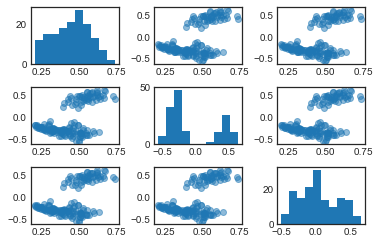

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

counter = 0 
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(X.shape[1]**2):
    ax = fig.add_subplot(3, 3, i+1)
    if counter == i : 
        counter += X.shape[1] + 1
        ax.hist(X[:, i % X.shape[1]])
    else:
        ax.scatter(X[:, 0], X[:, 1], alpha=0.5)

Automatically created module for IPython interactive environment


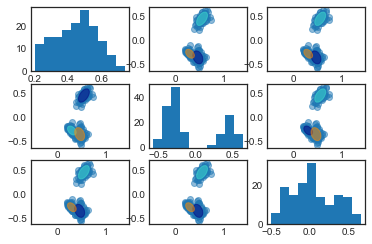

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.mixture import GaussianMixture

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')
        
        
        
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

counter = 0 
fig = plt.figure()
#fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(X.shape[1]**2):
    ax = fig.add_subplot(3, 3, i+1)
    if counter == i : 
        counter += X.shape[1] + 1
        ax.hist(X[:, i % X.shape[1]])
    else:
        gmm = GaussianMixture(n_components=X.shape[1], covariance_type='full').fit(X)
        ax.scatter(X[:, 0], X[:, 1], alpha=0.5)
        make_ellipses(gmm, ax)
        

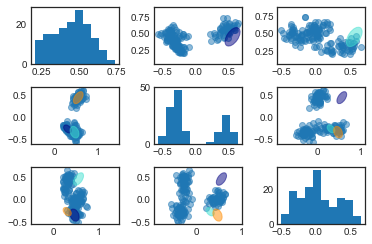

In [6]:
counter = 1
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        ax = fig.add_subplot(3, 3, counter)
        if j == i : 
            ax.hist(X[:, i])
        else:
            gmm = GaussianMixture(n_components=X.shape[1], covariance_type='full').fit(X)
            ax.scatter(X[:, j], X[:, i], alpha=0.5)
            make_ellipses(gmm, ax)
        counter += 1


In [7]:
def pairplot(
    X,
    labels=None,
    col_names=None,
    title=None,
    legend_name=None,
    variables=None,
    height=2.5,
    context="talk",
    font_scale=1,
    palette="Set1",
    alpha=0.7,
    size=50,
    marker=".",
    diag_kind="auto",
):
    # Handle X
    if not isinstance(X, (list, np.ndarray)):
        msg = "X must be array-like, not {}.".format(type(X))
        raise TypeError(msg)

    # Handle Y
    if labels is not None:
        if not isinstance(labels, (list, np.ndarray)):
            msg = "Y must be array-like or list, not {}.".format(type(labels))
            raise TypeError(msg)
        elif X.shape[0] != len(labels):
            msg = "Expected length {}, but got length {} instead for Y.".format(
                X.shape[0], len(labels)
            )
            raise ValueError(msg)

    # Handle col_names
    if col_names is None:
        col_names = ["Dimension {}".format(i) for i in range(1, X.shape[1] + 1)]
    elif not isinstance(col_names, list):
        msg = "col_names must be a list, not {}.".format(type(col_names))
        raise TypeError(msg)
    elif X.shape[1] != len(col_names):
        msg = "Expected length {}, but got length {} instead for col_names.".format(
            X.shape[1], len(col_names)
        )
        raise ValueError(msg)

    # Handle variables
    if variables is not None:
        if len(variables) > len(col_names):
            msg = "variables cannot contain more elements than col_names."
            raise ValueError(msg)
        else:
            for v in variables:
                if v not in col_names:
                    msg = "{} is not a valid key.".format(v)
                    raise KeyError(msg)
    else:
        variables = col_names

    df = pd.DataFrame(X, columns=col_names)
    if labels is not None:
        if legend_name is None:
            legend_name = "Type"
        df_labels = pd.DataFrame(labels, columns=[legend_name])
        df = pd.concat([df_labels, df], axis=1)

        names, counts = np.unique(labels, return_counts=True)
        if counts.min() < 2:
            diag_kind = "hist"
    plot_kws = dict(
        alpha=alpha,
        s=size,
        # edgecolor=None, # could add this latter
        linewidth=0,
        marker=marker,
    )
    with sns.plotting_context(context=context, font_scale=font_scale):
        if labels is not None:
            pairs = sns.pairplot(
                df,
                hue=legend_name,
                vars=variables,
                height=height,
                palette=palette,
                diag_kind=diag_kind,
                plot_kws=plot_kws,
            )
        else:
            pairs = sns.pairplot(
                df,
                vars=variables,
                height=height,
                palette=palette,
                diag_kind=diag_kind,
                plot_kws=plot_kws,
            )
        pairs.set(xticks=[], yticks=[])
        pairs.fig.subplots_adjust(top=0.945)
        pairs.fig.suptitle(title)

    return pairs

In [8]:
labels = ['Block 1'] * 50 + ['Block 2'] * 50 + ['Block 3'] * 50

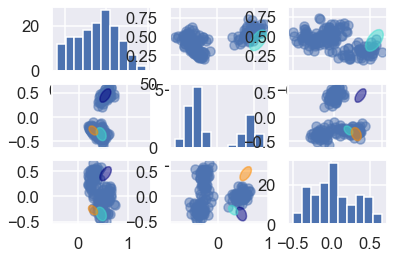

In [21]:
import seaborn as sns
with sns.plotting_context(context="talk", font_scale=1):
    counter = 1
    fig = plt.figure(figsize = )
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            ax = fig.add_subplot(3, 3, counter)
            if j == i : 
                ax.hist(X[:, i])
            else:
                gmm = GaussianMixture(n_components=X.shape[1], covariance_type='full').fit(X)
                ax.scatter(X[:, j], X[:, i], alpha=0.5)
                make_ellipses(gmm, ax)
                ax.tick_params(axis = "x")
                ax.tick_params(axis = "y")
            counter += 1
            



   

# Deeper exploration of GMM overlay on scatter

In [22]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [ ]:
gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X)